In [ ]:
# prompt: mount gdrive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, TimeDistributed, Activation,LSTM, GRU

In [ ]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('/content/gdrive/MyDrive/FYP/shuffled_dataset.csv')

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2)
print(len(train_set), len(test_set))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

In [ ]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)
tokenizer.fit_on_texts(lemmas)

In [ ]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 54


In [ ]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'ر': 5,
 'ک': 6,
 'ل': 7,
 'ھ': 8,
 'ت': 9,
 'د': 10,
 'م': 11,
 'س': 12,
 'ب': 13,
 'ں': 14,
 'پ': 15,
 'ٹ': 16,
 'چ': 17,
 'گ': 18,
 'ج': 19,
 'ہ': 20,
 'ے': 21,
 'ڑ': 22,
 'ئ': 23,
 'ڈ': 24,
 'ش': 25,
 'ف': 26,
 'ق': 27,
 'ُ': 28,
 'خ': 29,
 'ح': 30,
 'ع': 31,
 'ز': 32,
 'ص': 33,
 'ط': 34,
 'ِ': 35,
 'آ': 36,
 'ؤ': 37,
 'غ': 38,
 'ض': 39,
 'َ': 40,
 'ٗ': 41,
 'ث': 42,
 'ذ': 43,
 'ظ': 44,
 'ٔ': 45,
 'ً': 46,
 'ء': 47,
 'ٰ': 48,
 'ّ': 49,
 'ژ': 50,
 'ۓ': 51,
 'ؔ': 52,
 'ۃ': 53}

In [ ]:
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [ ]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['ناشتے', 'رکھئیں', 'گہرا', 'توریں', 'ٹوئڈ']
[[4, 1, 25, 9, 21], [5, 6, 8, 23, 3, 14], [18, 20, 5, 1], [9, 2, 5, 3, 14], [16, 2, 23, 24]]
['ناشتا', 'رکھ', 'گہرا', 'تور', 'ٹوئڈ']
[[4, 1, 25, 9, 1], [5, 6, 8], [18, 20, 5, 1], [9, 2, 5], [16, 2, 23, 24]]


اسلامآبادیوندیاں


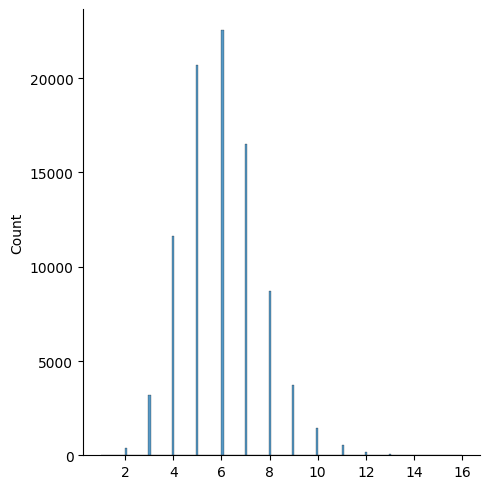

In [ ]:
import seaborn as sns

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

In [ ]:
max_len = max(len(seq) for seq in words_ints)
print('Maximum Sequence Length:', max_len)

Maximum Sequence Length: 16


In [ ]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[ 4,  1, 25,  9, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  8, 23,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18, 20,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  2,  5,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  2, 23, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 22, 13, 22,  1, 23, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 19,  8,  2, 16,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  3, 29,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  7, 38,  5,  1, 26,  2, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 26,  5,  3, 27,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

In [ ]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[ 4,  1, 25,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18, 20,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  2,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  2, 23, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 22, 13, 22,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 19,  8,  2, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  3, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  7, 38,  5,  1, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 26,  5,  3, 27,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

In [ ]:
X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')

In [ ]:
print(X_train.shape)
print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(89660, 16)
(89660, 16)


In [ ]:
words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
print(words_matrix.shape)

(89660, 54)


In [ ]:
lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
print(lemmas_matrix.shape)

(89660, 54)


In [ ]:
print(words[2])
print(words_matrix[2,:])

گہرا
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(GRU(units=64, return_sequences=True)) # BiLSTM layer
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))  # TimeDistributed for sequence prediction

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
561/561 [==============================] - 12s 11ms/step - loss: 0.6671 - accuracy: 0.8597 - val_loss: 0.1218 - val_accuracy: 0.9631
Epoch 2/20
561/561 [==============================] - 5s 9ms/step - loss: 0.1013 - accuracy: 0.9669 - val_loss: 0.0879 - val_accuracy: 0.9704
Epoch 3/20
561/561 [==============================] - 4s 6ms/step - loss: 0.0862 - accuracy: 0.9702 - val_loss: 0.0808 - val_accuracy: 0.9722
Epoch 4/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0806 - accuracy: 0.9720 - val_loss: 0.0772 - val_accuracy: 0.9738
Epoch 5/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0765 - accuracy: 0.9733 - val_loss: 0.0736 - val_accuracy: 0.9745
Epoch 6/20
561/561 [==============================] - 4s 8ms/step - loss: 0.0733 - accuracy: 0.9745 - val_loss: 0.0729 - val_accuracy: 0.9750
Epoch 7/20
561/561 [==============================] - 3s 6ms/step - loss: 0.0703 - accuracy: 0.9758 - val_loss: 0.0674 - val_accuracy: 0.9773
Epoc

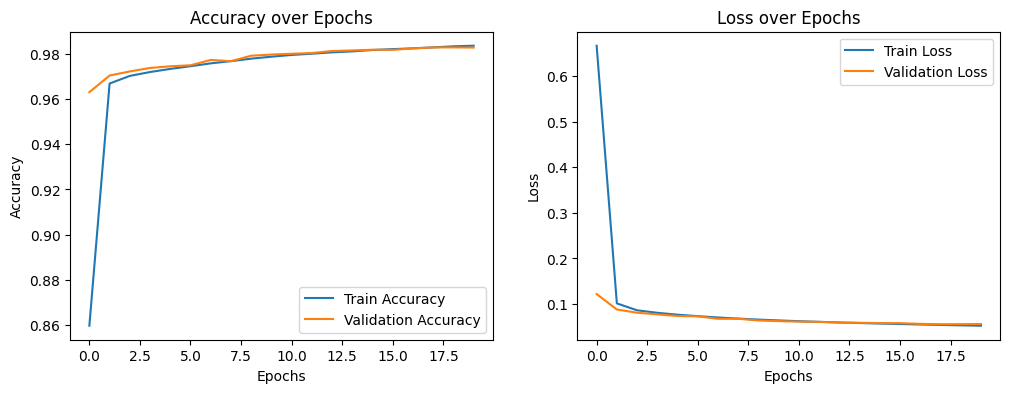

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prepare testing data
X_test_texts = [n for (n, l) in test_set]
Y_test_texts = [l for (n, l) in test_set]
X_test = np.array(pad_sequences(tokenizer.texts_to_sequences(X_test_texts), maxlen=max_len, padding='post')).astype('int32')
y_test = np.array(pad_sequences(tokenizer.texts_to_sequences(Y_test_texts), maxlen=max_len, padding='post')).astype('int32')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# Flatten the predictions and true labels for evaluation
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Filter out padding
mask = y_test_flat != 0
y_test_flat = y_test_flat[mask]
y_pred_flat = y_pred_flat[mask]

# Calculate metrics
precision = precision_score(y_test_flat, y_pred_flat, average='macro')
recall = recall_score(y_test_flat, y_pred_flat, average='macro')
f1 = f1_score(y_test_flat, y_pred_flat, average='macro')
accuracy = accuracy_score(y_test_flat, y_pred_flat)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

701/701 [==============================] - 3s 4ms/step
Precision: 0.9499729437701987
Recall: 0.9067796495672906
F1-score: 0.9234471659403748
Accuracy: 0.9603460629458127


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to a file
model.save('BiLSTM.h5')

# Print a success message
print("Model saved successfully as 'BiLSTM.h5'")

Model saved successfully as 'LSTM.h5'


In [ ]:
# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

def predict_lemma(word):

  max_len=16
  with open('/content/gdrive/MyDrive/FYP/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

  # Convert the word to a sequence of integers
  sequence = tokenizer.texts_to_sequences([word])

  # Pad the sequence to the maximum length
  padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')

  model = load_model('/content/gdrive/MyDrive/FYP/BiLSTM.h5')

  # Predict the lemma using the trained model
  predictions = model.predict(padded_sequence)

  # Convert the prediction to the corresponding lemma
  # Since the output is a sequence, we need to take the argmax for each timestep
  lemma_sequence = np.argmax(predictions, axis=-1)[0]

  # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
  lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])

  return lemma

In [ ]:
# Example usage (Actuall lemma = ڈھگا):
word = 'ڈھگائیں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 306ms/step
The predicted lemma for ڈھگائیں is: ڈھگا


In [ ]:
# Example usage (Actuall lemma = ڈراونہ):
word = 'ڈراونہیو'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 323ms/step
The predicted lemma for ڈراونہیو is: ڈراونہ


In [ ]:
# Example usage (Actuall lemma = 'تگڑا'):
word = 'تگڑادا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 478ms/step
The predicted lemma for تگڑادا is: تگڑا


In [ ]:
word = 'ہونا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 602ms/step
The predicted lemma for ہونا is: ہو


In [ ]:
word = 'جہانیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 570ms/step
The predicted lemma for جہانیاں is: جہان


In [ ]:
word = 'خانسامنوں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 650ms/step
The predicted lemma for خانسامنوں is: خانسامن


In [ ]:
predicted_lemma = predict_lemma('جميعت')
print(f"The predicted lemma for 'جميعت' is: {predicted_lemma}")

1/1 [==============================] - 0s 499ms/step
The predicted lemma for 'جميعت' is: جمعت


In [ ]:
# Example usage:
word = 'جھجکوں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 483ms/step
The predicted lemma for جھجکوں is: جھجک


In [ ]:
word = 'پهنسوائیو'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 320ms/step
The predicted lemma for پهنسوائیو is: پنسوا


In [ ]:
# Example usage (Actuall lemma ='جھپٹوا'):
word = 'جھپٹواوندیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 316ms/step
The predicted lemma for جھپٹواوندیاں is: جھپٹوا


In [ ]:
# Example usage (Actuall lemma ='کھانا'):
word = 'کرنا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 333ms/step
The predicted lemma for کرنا is: کرن


In [ ]:
# Example usage (Actuall lemma ='کھانا'):
word = 'وداندیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 337ms/step
The predicted lemma for وداندیاں is: ودا


In [ ]:
# Example usage (Actuall lemma ='کھانا'):
word = 'چھڈواوئیے'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 0s 339ms/step
The predicted lemma for چھڈواوئیے is: چھڈوا


In [ ]:
# Example usage (Actuall lemma ='چوندا'):
word = 'چوندهيانا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 0s 333ms/step
The predicted lemma for چوندهيانا is: چوندا


In [ ]:
# Example usage (Actuall lemma ='مچوا'):
word = 'مچواندیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 323ms/step
The predicted lemma for مچواندیاں is: مچوا


In [ ]:
word = 'فلاںدیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 2s 2s/step
The predicted lemma for فلاںدیاں is: فلاں


In [ ]:
word = 'کهيوٹو'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 0s 351ms/step
The predicted lemma for کهيوٹو is: کوٹو


In [ ]:
word = 'جائیے'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 0s 305ms/step
The predicted lemma for جائیے is: جائ


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 618ms/step


1/1 [==============================] - 1s 887ms/step
Correct Predictions: 908
Incorrect Predictions: 92


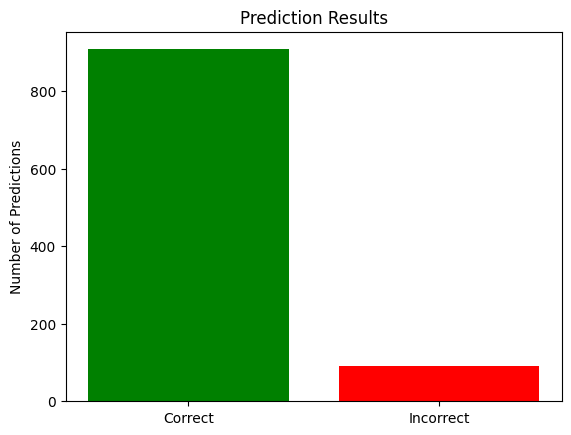

        Word True Lemma Predicted Lemma
0    دھمکایا      دھمکا           دھمکا
1     سنگھنے     سنگھنا          سنگھنا
2       فائر       فائر            فائر
3   جھانکئیے      جھانک           جھانک
4     دوزخاں       دوزخ            دوزخ
5    مٹکائیے       مٹکا            مٹکا
6       ٹٹوٗ         ٹٹ              ٹٹ
7     کبابوں       کباب            کباب
8   رکھواندا      رکھوا           رکھوا
9     تلاندا        تلا             تلا
10    ودیادے       ودیا            ودیا
11   حشائشوں      حشائش           حشائش
12   کپاچیوں       کپاچ            کپاچ
13  چھڈواویو      چھڈوا           چھڈوا
14   مڑواندے       مڑوا            مڑوا
15       نچا         نچ             نچا
16     ڈونڈی       ڈونڈ            ڈونڈ
17      ساکا        ساک            ساکا
18     تجتیں         تج              تج
19   گبرائیو       گبرا            گبرا


In [ ]:
words_test = [n for (n, l) in test_set]  # X_test
lemmas_test = [l for (n, l) in test_set]  # y_test

# Predict lemmas for 1000 words from the test set
words_test_sample = words_test[:1000]
lemmas_test_sample = lemmas_test[:1000]

predicted_lemmas = [predict_lemma(word) for word in words_test_sample]

# Evaluate predictions
correct_predictions = sum([pred == true for pred, true in zip(predicted_lemmas, lemmas_test_sample)])
incorrect_predictions = len(predicted_lemmas) - correct_predictions

# Output the results
print(f'Correct Predictions: {correct_predictions}')
print(f'Incorrect Predictions: {incorrect_predictions}')

# Visualize the results
results = {
    'Correct': correct_predictions,
    'Incorrect': incorrect_predictions
}

fig, ax = plt.subplots()
ax.bar(results.keys(), results.values(), color=['green', 'red'])
ax.set_ylabel('Number of Predictions')
ax.set_title('Prediction Results')
plt.show()

# Detailed comparison
comparison_df = pd.DataFrame({
    'Word': words_test_sample,
    'True Lemma': lemmas_test_sample,
    'Predicted Lemma': predicted_lemmas
})

print(comparison_df.head(20))


In [ ]:
# # Displaying the results
# for word, actual_lemma, predicted_lemma in actual_and_predicted_lemmas:
#     print(f"Word: {word}, Actual Lemma: {actual_lemma}, Predicted Lemma: {predicted_lemma}")

print(comparison_df)

          Word True Lemma Predicted Lemma
0      دھمکایا      دھمکا           دھمکا
1       سنگھنے     سنگھنا          سنگھنا
2         فائر       فائر            فائر
3     جھانکئیے      جھانک           جھانک
4       دوزخاں       دوزخ            دوزخ
..         ...        ...             ...
995  برداردیاں      بردار           بردار
996       گباو        گبا             گبا
997     تشبہوں     تشبہوں            تشبہ
998        سقم        سقم             سقم
999     دسوایو       دسوا            دسوا

[1000 rows x 3 columns]
